In [8]:
import numpy as np

In [1]:
import pandas as pd
df = pd.read_csv("../data/TSLA_historical_data.csv")

In [2]:
prices = df['Adj Close']

# Split data into train and test sets
train_size = int(len(prices) * 0.8)
train, test = prices[:train_size], prices[train_size:]

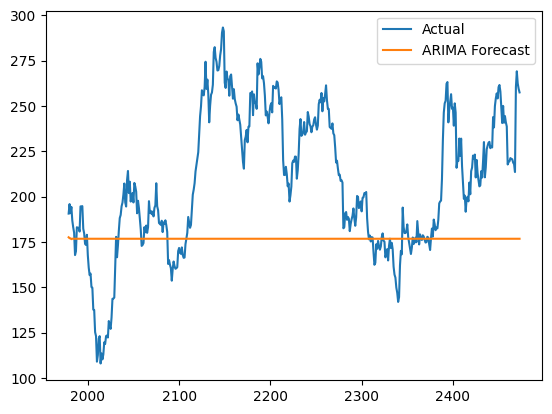

In [3]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Train ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # Adjust (p, d, q) as needed
arima_model = model.fit()

# Forecasting
forecast = arima_model.forecast(steps=len(test))
plt.plot(test, label="Actual")
plt.plot(forecast, label="ARIMA Forecast")
plt.legend()
plt.show()

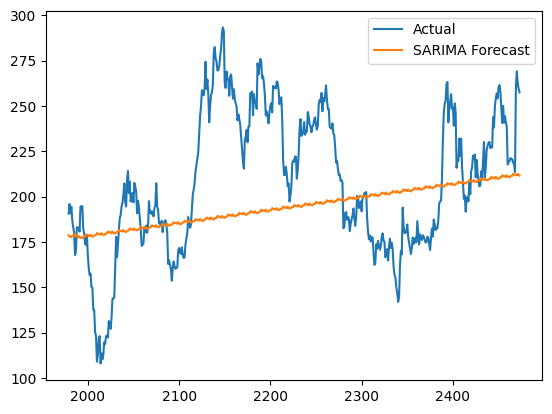

In [4]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Train SARIMA model
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()

# Forecasting
sarima_forecast = sarima_model.forecast(steps=len(test))
plt.plot(test, label="Actual")
plt.plot(sarima_forecast, label="SARIMA Forecast")
plt.legend()
plt.show()

Epoch 1/10
60/60 [==============================] - 15s 80ms/step - loss: 0.0062
Epoch 2/10
60/60 [==============================] - 4s 75ms/step - loss: 9.8784e-04
Epoch 3/10
60/60 [==============================] - 5s 85ms/step - loss: 9.3298e-04
Epoch 4/10
60/60 [==============================] - 5s 83ms/step - loss: 8.7432e-04
Epoch 5/10
60/60 [==============================] - 4s 71ms/step - loss: 8.3979e-04
Epoch 6/10
60/60 [==============================] - 4s 73ms/step - loss: 7.4664e-04
Epoch 7/10
60/60 [==============================] - 4s 69ms/step - loss: 6.7543e-04
Epoch 8/10
60/60 [==============================] - 4s 74ms/step - loss: 5.9928e-04
Epoch 9/10
60/60 [==============================] - 5s 75ms/step - loss: 5.9609e-04
Epoch 10/10
14/14 [==============================] - 2s 27ms/step


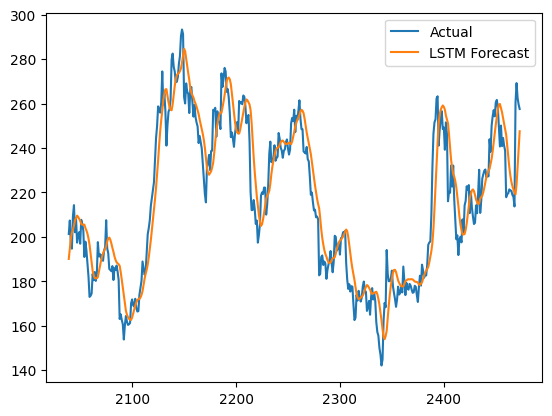

In [9]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(np.array(train).reshape(-1, 1))
test_scaled = scaler.transform(np.array(test).reshape(-1, 1))

# Prepare data for LSTM
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, 0])
        y.append(data[i+seq_length, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_scaled)

# Define LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Forecast
X_test, _ = create_sequences(test_scaled)
lstm_forecast = model.predict(X_test)
lstm_forecast = scaler.inverse_transform(lstm_forecast)

plt.plot(test.iloc[60:], label="Actual")
plt.plot(test.index[60:], lstm_forecast, label="LSTM Forecast")
plt.legend()
plt.show()